<a href="https://colab.research.google.com/github/noircir/TensorFlow-Examples/blob/master/TF1_CNN_00_MNIST_Data_Basic_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Data Set - Basic Approach (Softmax)

### Get the MNIST Data

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [41]:
mnist = input_data.read_data_sets("/content/drive/My Drive/Colab Notebooks/TF 1.0/MNIST_data/",one_hot=True)

Extracting /content/drive/My Drive/Colab Notebooks/TF 1.0/MNIST_data/train-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/Colab Notebooks/TF 1.0/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /content/drive/My Drive/Colab Notebooks/TF 1.0/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/Colab Notebooks/TF 1.0/MNIST_data/t10k-labels-idx1-ubyte.gz


** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [42]:
type(mnist)  # Specialized TF dataset with convenience methods

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [43]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
mnist.train.num_examples

55000

In [45]:
mnist.test.num_examples

10000

In [46]:
mnist.validation.num_examples

5000

### Visualizing the Data

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
single_image = mnist.train.images[17]

In [49]:
single_image.shape

(784,)

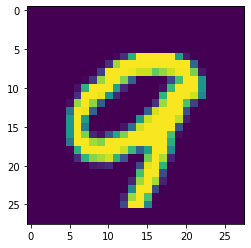

In [50]:
plt.imshow(single_image.reshape(28,28));

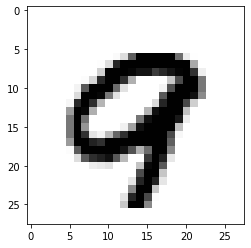

In [51]:
# grayscale
plt.imshow(single_image.reshape(28,28),cmap='gist_gray_r');

In [52]:
# already normalized data
print(single_image.min(), "--", single_image.max())

0.0 -- 1.0


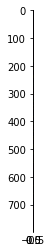

In [53]:
plt.imshow(single_image.reshape(784,1));

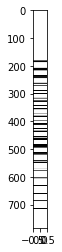

In [54]:
plt.imshow(single_image.reshape(784,1),cmap='gist_gray_r',aspect=0.02);

## Create the Model

In [0]:
x = tf.placeholder(tf.float32,shape=[None,784]) # None is the batch size

In [0]:
# 10 because 0-9 possible numbers
# Zeros for simplification, even though not a good idea

W = tf.Variable(tf.zeros([784,10]))

In [0]:
b = tf.Variable(tf.zeros([10]))

In [0]:
# Create the Graph
y = tf.matmul(x,W) + b 

Loss and Optimizer

In [0]:
y_true = tf.placeholder(tf.float32,[None,10])

In [0]:
# Cross Entropy

In [60]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [0]:
train = optimizer.minimize(cross_entropy)

### Create Session

In [0]:
init = tf.global_variables_initializer()

In [64]:
mnist.train.__class__

tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet

In [66]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):

        # mnist.train.next_batch method:  https://bit.ly/399fBpN
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
   
   # y's are not known yet
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1)) # a list of booleans (matches or not)
    
    # convert the booleans to a list of 1s and 0s, cast them to floats (to be able to take a mean)
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9189


91.89% accuracy with this linear regression approach